In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from data_extraction import *
from os import listdir
import pandas as pd

In [2]:
from keras.utils.np_utils import to_categorical

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

Using TensorFlow backend.


In [3]:
data_folder = 'dataset'
file_list = [ i for i in listdir(data_folder) if '.dat' in i]

In [4]:
file_list

['S2-Drill.dat',
 'S1-ADL4.dat',
 'S3-ADL3.dat',
 'S3-ADL5.dat',
 'S1-ADL2.dat',
 'S4-ADL4.dat',
 'S4-ADL1.dat',
 'S3-ADL2.dat',
 'S3-ADL4.dat',
 'S4-ADL2.dat',
 'S1-ADL1.dat',
 'S1-ADL3.dat',
 'S2-ADL5.dat',
 'S4-Drill.dat',
 'S4-ADL3.dat',
 'S2-ADL4.dat',
 'S4-ADL5.dat',
 'S2-ADL1.dat',
 'S1-Drill.dat',
 'S3-ADL1.dat',
 'S2-ADL2.dat',
 'S3-Drill.dat',
 'S2-ADL3.dat',
 'S1-ADL5.dat']

In [5]:
# train opp classifier on training dataset

file_list = ['S1-ADL1.dat', 'S1-ADL2.dat', 'S1-ADL3.dat', 'S1-ADL4.dat', 'S1-ADL5.dat', 'S1-Drill.dat',
             'S2-ADL1.dat', 'S2-ADL2.dat', 'S2-ADL3.dat', 'S2-ADL4.dat', 'S2-ADL5.dat', 'S2-Drill.dat',
             'S3-ADL1.dat', 'S3-ADL2.dat', 'S3-ADL3.dat', 'S3-ADL4.dat', 'S3-ADL5.dat', 'S3-Drill.dat'
            ]

In [6]:
# label_list

In [7]:
label1 = np.zeros([0,1])
label2 = np.zeros([0,1])
data = np.zeros([0,77])

for file_i in file_list:
    label_y, label_list, data_x = extract_data_from_file(file_i, 
                                                     plot_option = False, 
                                                     show_other = False)
    label1 = np.concatenate((label1, label_y[0].reshape([-1, 1])), axis = 0)
    label2 = np.concatenate((label2, label_y[1].reshape([-1, 1])), axis = 0)
    data = np.concatenate((data, data_x), axis = 0)


reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


In [8]:
train_x = data
train_y1 = label1
train_y2 = label2

print(train_x.shape)
print(train_y1.shape)
print(train_y2.shape)

train_y1 = to_categorical(train_y1-1, num_classes=len(label_list[0] ) )
train_y2 = to_categorical(train_y2-1, num_classes=len(label_list[1] ) )
train_x = np.expand_dims(train_x, axis=-1)
train_x = np.expand_dims(train_x, axis=-1)
print('\n')
print(train_x.shape)
print(train_y1.shape)
print(train_y2.shape)

(662467, 77)
(662467, 1)
(662467, 1)


(662467, 77, 1, 1)
(662467, 18)
(662467, 5)


In [9]:
662467/30/60/60 # num of hours for training data

6.133953703703704

# preparing testing data

In [10]:
# train opp classifier on training dataset

test_list = ['S4-ADL1.dat', 'S4-ADL2.dat', 'S4-ADL3.dat', 'S4-ADL4.dat', 'S4-ADL5.dat', 'S4-Drill.dat',
            ]

In [11]:
label1 = np.zeros([0,1])
label2 = np.zeros([0,1])
data = np.zeros([0,77])

for file_i in test_list:
    label_y, label_list, data_x = extract_data_from_file(file_i, 
                                                     plot_option = False, 
                                                     show_other = False)
    label1 = np.concatenate((label1, label_y[0].reshape([-1, 1])), axis = 0)
    label2 = np.concatenate((label2, label_y[1].reshape([-1, 1])), axis = 0)
    data = np.concatenate((data, data_x), axis = 0)


reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


In [12]:
test_x = data
test_y1 = label1
test_y2 = label2

print(test_x.shape)
print(test_y1.shape)
print(test_y2.shape)

test_y1 = to_categorical(test_y1-1, num_classes=len(label_list[0] ) )
test_y2 = to_categorical(test_y2-1, num_classes=len(label_list[1] ) )
test_x = np.expand_dims(test_x, axis=-1)
test_x = np.expand_dims(test_x, axis=-1)
print('\n')
print(test_x.shape)
print(test_y1.shape)
print(test_y2.shape)

(190106, 77)
(190106, 1)
(190106, 1)


(190106, 77, 1, 1)
(190106, 18)
(190106, 5)


In [13]:
190106/30/3600

1.7602407407407408

# Definine neural network

In [14]:
import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Dropout, Flatten
# from tensorflow.keras.layers import BatchNormalization, Permute, Reshape
from keras.losses import categorical_crossentropy

from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, LSTM, Flatten, Embedding, Concatenate, concatenate, Permute, Reshape 
# changing merge to concatenate
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
import h5py

import numpy as np

from keras.utils.np_utils import to_categorical

from keras.engine.input_layer import Input
from keras.models import Model

import keras

from keras.utils import plot_model




from keras.engine.input_layer import Input
from keras.models import Model
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
# import tensorflow


from keras.callbacks import ModelCheckpoint

In [15]:
def model_ConvLSTM(dim, win_len, 
                   num_classes_1,
                   num_feat_map,
                   dropout_rate,
                   batchnorm=True, dropout=True):
    
    model = Sequential(name='ConvLSTM')
    
    # default data_format for conv2d: channels_last (batch, rows, cols, channels)
    model.add(Convolution2D(num_feat_map, kernel_size=(1, 3),
                            activation='relu',
                            input_shape= (dim, win_len, 1),
                            padding='same', name = 'Conv_1'))
    
    if batchnorm:
        model.add(BatchNormalization(name='Bn_1'))
#     model.add(MaxPooling2D(pool_size=(1, 2), name='Max_pool_1'))
    if dropout:
        model.add(Dropout(dropout_rate, name='Drop_1'))
    model.add(Convolution2D(num_feat_map, kernel_size=(1, 3),
                     activation='relu', padding='same', name='Conv_2'))
    if batchnorm:
        model.add(BatchNormalization(name='Bn_2'))
#     model.add(MaxPooling2D(pool_size=(1, 2), name='Max_pool_2'))
    if dropout:
        model.add(Dropout(dropout_rate, name='Drop_2'))
        
    model.add(Permute((2, 1, 3), name='Permute_1'))  # for swap-dimension
    model.add(Reshape((-1, num_feat_map * dim), name='Reshape_1'))
    model.add(LSTM(32, return_sequences=False, stateful=False, name='Lstm_1'))
#     model.add(Dense(32, activation='tanh', name='dense_1') )
    if dropout:
        model.add(Dropout(dropout_rate, name='Drop_3'))
        
    model.add( Dense(num_classes_1, activation='softmax', name='dense_out1') )
    
    return model

In [16]:
dim = test_x.shape[1]
win_len = 1
num_classes_1 = test_y1.shape[1]
num_classes_2 = test_y2.shape[1]
print(dim, num_classes_1, num_classes_2)

num_feat_map = 64
dropout_rate = 0.3

77 18 5


In [17]:
model_1 = model_ConvLSTM(dim, win_len, 
                   num_classes_1,
                   num_feat_map,
                   dropout_rate,
                   batchnorm=True, dropout=True)

In [18]:
model_1.summary()

Model: "ConvLSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 77, 1, 64)         256       
_________________________________________________________________
Bn_1 (BatchNormalization)    (None, 77, 1, 64)         256       
_________________________________________________________________
Drop_1 (Dropout)             (None, 77, 1, 64)         0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 77, 1, 64)         12352     
_________________________________________________________________
Bn_2 (BatchNormalization)    (None, 77, 1, 64)         256       
_________________________________________________________________
Drop_2 (Dropout)             (None, 77, 1, 64)         0         
_________________________________________________________________
Permute_1 (Permute)          (None, 1, 77, 64)         0  

In [19]:
print('model training ...')

model_name = 'single_1'

############## training ##############   
save_path = 'opp_model/'+ model_name+'.hdf5'
# es = EarlyStopping(monitor='val_MAE', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint(save_path, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

cb_list = [mc]
    
    
    
epochs = 200
batch_size=300
model_1.compile(loss=categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])


print('============ Start Opp Model Training ===========\n')
print('The maximum training epochs is: ', epochs)
H = model_1.fit(train_x, [train_y1],
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            shuffle=True,
            callbacks = cb_list,
            validation_split = 0.2)
#                 validation_data=(test_data, test_label))

model training ...
============ Start Opp Model Training ===========

The maximum training epochs is:  200
Train on 529973 samples, validate on 132494 samples
Epoch 1/200
529973/529973 [==============================] - 28s 53us/step - loss: 0.6707 - accuracy: 0.8055 - val_loss: 0.8486 - val_accuracy: 0.7295

Epoch 00001: val_accuracy improved from -inf to 0.72950, saving model to opp_model/single_1.hdf5
Epoch 2/200
529973/529973 [==============================] - 25s 47us/step - loss: 0.4697 - accuracy: 0.8513 - val_loss: 0.7661 - val_accuracy: 0.7522

Epoch 00002: val_accuracy improved from 0.72950 to 0.75221, saving model to opp_model/single_1.hdf5
Epoch 3/200
529973/529973 [==============================] - 26s 49us/step - loss: 0.4216 - accuracy: 0.8623 - val_loss: 0.7870 - val_accuracy: 0.7516

Epoch 00003: val_accuracy did not improve from 0.75221
Epoch 4/200
529973/529973 [==============================] - 25s 47us/step - loss: 0.3941 - accuracy: 0.8693 - val_loss: 0.7175 - val


Epoch 00037: val_accuracy did not improve from 0.79280
Epoch 38/200
529973/529973 [==============================] - 25s 46us/step - loss: 0.2114 - accuracy: 0.9252 - val_loss: 0.8286 - val_accuracy: 0.7891

Epoch 00038: val_accuracy did not improve from 0.79280
Epoch 39/200
529973/529973 [==============================] - 25s 47us/step - loss: 0.2114 - accuracy: 0.9254 - val_loss: 0.8515 - val_accuracy: 0.7886

Epoch 00039: val_accuracy did not improve from 0.79280
Epoch 40/200
529973/529973 [==============================] - 24s 46us/step - loss: 0.2096 - accuracy: 0.9258 - val_loss: 0.8687 - val_accuracy: 0.7844

Epoch 00040: val_accuracy did not improve from 0.79280
Epoch 41/200
529973/529973 [==============================] - 25s 47us/step - loss: 0.2088 - accuracy: 0.9263 - val_loss: 0.9148 - val_accuracy: 0.7804

Epoch 00041: val_accuracy did not improve from 0.79280
Epoch 42/200
529973/529973 [==============================] - 24s 46us/step - loss: 0.2064 - accuracy: 0.9269 - 

KeyboardInterrupt: 

In [ ]:
# H.history

In [20]:
y_pred1 = model_1.predict(test_x)

In [21]:
y_pred1= np.argmax(y_pred1, axis=1)
y_true1 = np.argmax(test_y1, axis=1)
cf_matrix = confusion_matrix(y_true1, y_pred1)
print(cf_matrix)
class_wise_f1 = f1_score(y_true1, y_pred1, average=None)
print('the mean-f1 score: {:.4f}'.format(np.mean(class_wise_f1)))
accuracy = accuracy_score(y_true1, y_pred1)
print('accuracy is: {:.4f}'.format(accuracy))

[[130900     98    151    262    262     95    304    121    373    175
     126    408    117    626    280   2357   2041    157]
 [   664   1727      0    744      0      0      0      0      0      0
       0      0      0      0      0      0     43      0]
 [   616      0   1162     12   1108      0      0      0      0      0
       0      0      0      0      0      0      0      0]
 [   413    250      0   2277      0      0      0      0      0      0
       0      0      0      0      0      1      1      0]
 [   279      6    176     11   2278      0      0      0      0      0
       0      0      0      0      0      0      0      0]
 [  2713      0      0      0      0    397    448    119    260     30
       2      4      0      4      0      0      0      0]
 [  2372      0      0      0      1    189   1099     82    181     33
      21      5     24      0      3      9      0      6]
 [   897      0      2      2      0     31      7    314    477     64
       2   

### 2nd model

In [22]:
# 2nd model
model_2 = model_ConvLSTM(dim, win_len, 
                   num_classes_2,
                   num_feat_map,
                   dropout_rate,
                   batchnorm=True, dropout=True)

model_2.summary()

Model: "ConvLSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 77, 1, 64)         256       
_________________________________________________________________
Bn_1 (BatchNormalization)    (None, 77, 1, 64)         256       
_________________________________________________________________
Drop_1 (Dropout)             (None, 77, 1, 64)         0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 77, 1, 64)         12352     
_________________________________________________________________
Bn_2 (BatchNormalization)    (None, 77, 1, 64)         256       
_________________________________________________________________
Drop_2 (Dropout)             (None, 77, 1, 64)         0         
_________________________________________________________________
Permute_1 (Permute)          (None, 1, 77, 64)         0  

In [23]:
print('model training ...')

model_name = 'single_2'

############## training ##############   
save_path = 'opp_model/'+ model_name+'.hdf5'
# es = EarlyStopping(monitor='val_MAE', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint(save_path, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

cb_list = [mc]
    
    
    
epochs = 200
batch_size=300
model_2.compile(loss=categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])


print('============ Start Opp Model Training ===========\n')
print('The maximum training epochs is: ', epochs)
H = model_2.fit(train_x, [train_y2],
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            shuffle=True,
            callbacks = cb_list,
            validation_split = 0.2)
#                 validation_data=(test_data, test_label))

model training ...
============ Start Opp Model Training ===========

The maximum training epochs is:  200
Train on 529973 samples, validate on 132494 samples
Epoch 1/200
529973/529973 [==============================] - 26s 50us/step - loss: 0.4021 - accuracy: 0.8456 - val_loss: 0.5542 - val_accuracy: 0.7879

Epoch 00001: val_accuracy improved from -inf to 0.78788, saving model to opp_model/single_2.hdf5
Epoch 2/200
529973/529973 [==============================] - 25s 48us/step - loss: 0.3294 - accuracy: 0.8711 - val_loss: 0.5297 - val_accuracy: 0.7970

Epoch 00002: val_accuracy improved from 0.78788 to 0.79704, saving model to opp_model/single_2.hdf5
Epoch 3/200
529973/529973 [==============================] - 25s 48us/step - loss: 0.3078 - accuracy: 0.8800 - val_loss: 0.5992 - val_accuracy: 0.7727

Epoch 00003: val_accuracy did not improve from 0.79704
Epoch 4/200
529973/529973 [==============================] - 26s 48us/step - loss: 0.2940 - accuracy: 0.8851 - val_loss: 0.5252 - val

529973/529973 [==============================] - 25s 46us/step - loss: 0.1622 - accuracy: 0.9367 - val_loss: 0.6596 - val_accuracy: 0.8095

Epoch 00077: val_accuracy did not improve from 0.82099
Epoch 78/200
529973/529973 [==============================] - 26s 49us/step - loss: 0.1612 - accuracy: 0.9374 - val_loss: 0.6465 - val_accuracy: 0.8181

Epoch 00078: val_accuracy did not improve from 0.82099
Epoch 79/200
529973/529973 [==============================] - 25s 47us/step - loss: 0.1605 - accuracy: 0.9378 - val_loss: 0.6514 - val_accuracy: 0.8180

Epoch 00079: val_accuracy did not improve from 0.82099
Epoch 80/200
529973/529973 [==============================] - 26s 48us/step - loss: 0.1612 - accuracy: 0.9378 - val_loss: 0.6067 - val_accuracy: 0.8182

Epoch 00080: val_accuracy did not improve from 0.82099
Epoch 81/200
529973/529973 [==============================] - 24s 46us/step - loss: 0.1601 - accuracy: 0.9378 - val_loss: 0.6738 - val_accuracy: 0.8137

Epoch 00081: val_accuracy di

KeyboardInterrupt: 

In [24]:
y_pred2 = model_2.predict(test_x)

In [25]:
y_pred2= np.argmax(y_pred2, axis=1)
y_true2 = np.argmax(test_y2, axis=1)
cf_matrix = confusion_matrix(y_true2, y_pred2)
print(cf_matrix)
class_wise_f1 = f1_score(y_true2, y_pred2, average=None)
print('the mean-f1 score: {:.4f}'.format(np.mean(class_wise_f1)))
accuracy = accuracy_score(y_true2, y_pred2)
print('accuracy is: {:.4f}'.format(accuracy))

[[28180  6745  4491  3741    20]
 [ 2116 54448 16548  3248     2]
 [ 1461  3884 35865   297     1]
 [  551   565   313 22311     9]
 [  821     0     1   558  3930]]
the mean-f1 score: 0.7815
accuracy is: 0.7613


# loading saved model

In [26]:
from keras.models import load_model

model_name = 'single_1'
save_path = 'opp_model/'+ model_name+'.hdf5'
trained_model_1 = load_model(save_path)

model_name = 'single_2'
save_path = 'opp_model/'+ model_name+'.hdf5'
trained_model_2 = load_model(save_path)

# evaluate saved model
y_pred1 = trained_model_1.predict(test_x)
y_pred1= np.argmax(y_pred1, axis=1)
y_true1 = np.argmax(test_y1, axis=1)
cf_matrix = confusion_matrix(y_true1, y_pred1)
print(cf_matrix)
class_wise_f1 = f1_score(y_true1, y_pred1, average=None)
print('the mean-f1 score: {:.4f}'.format(np.mean(class_wise_f1)))
accuracy = accuracy_score(y_true1, y_pred1)
print('accuracy is: {:.4f}'.format(accuracy))


y_pred2 = trained_model_2.predict(test_x)
y_pred2= np.argmax(y_pred2, axis=1)
y_true2 = np.argmax(test_y2, axis=1)
cf_matrix = confusion_matrix(y_true2, y_pred2)
print(cf_matrix)
class_wise_f1 = f1_score(y_true2, y_pred2, average=None)
print('the mean-f1 score: {:.4f}'.format(np.mean(class_wise_f1)))
accuracy = accuracy_score(y_true2, y_pred2)
print('accuracy is: {:.4f}'.format(accuracy))

[[131666     63    133    300    290    134    363     58    136    106
     329    300    122    311    661   1579   2120    182]
 [   740   1674      0    646      0      0      0      0      0      0
       0      0      0      0      0      0    118      0]
 [   612      0   1213      1   1072      0      0      0      0      0
       0      0      0      0      0      0      0      0]
 [   420    212      0   2310      0      0      0      0      0      0
       0      0      0      0      0      0      0      0]
 [   301      5    483     12   1949      0      0      0      0      0
       0      0      0      0      0      0      0      0]
 [  2718      0      0      0      0    390    574     65    171     42
       0     11      2      3      0      1      0      0]
 [  2305      0      0      0      1    149   1189     28    132     33
      94     38     34      1     10      9      0      2]
 [  1255      0      0      1      0     56     12    198    170     25
       2   

In [ ]:
# opportunity data ref:
# https://www.mdpi.com/1424-8220/16/1/115
# https://github.com/vikranth94/Activity-Recognition/blob/master/Activity-Recognition.ipynb

# observe the difference between ground truth label vs pseudo label

In [27]:
label_y, label_list, data_x = extract_data_from_file('S1-ADL4.dat', 
                                                         plot_option = False, 
                                                         show_other = False)

reading file 1 of 1
reading file 1 of 1
reading file 1 of 1


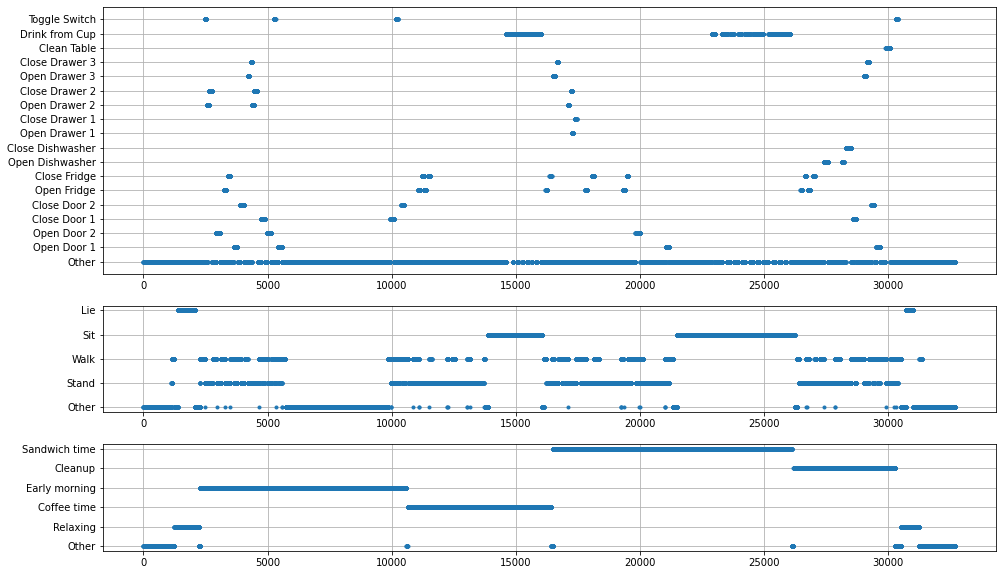

In [28]:
visualize_data_labels(label_y ,label_list, show_other = True)

In [29]:
y_pred1 = trained_model_1.predict(test_x)
y_pred2 = trained_model_2.predict(test_x)

y_pred1= np.argmax(y_pred1, axis=1)+1
y_pred2= np.argmax(y_pred2, axis=1)+1

pseudo_label_y = [y_pred1, y_pred2, label_y[2]]

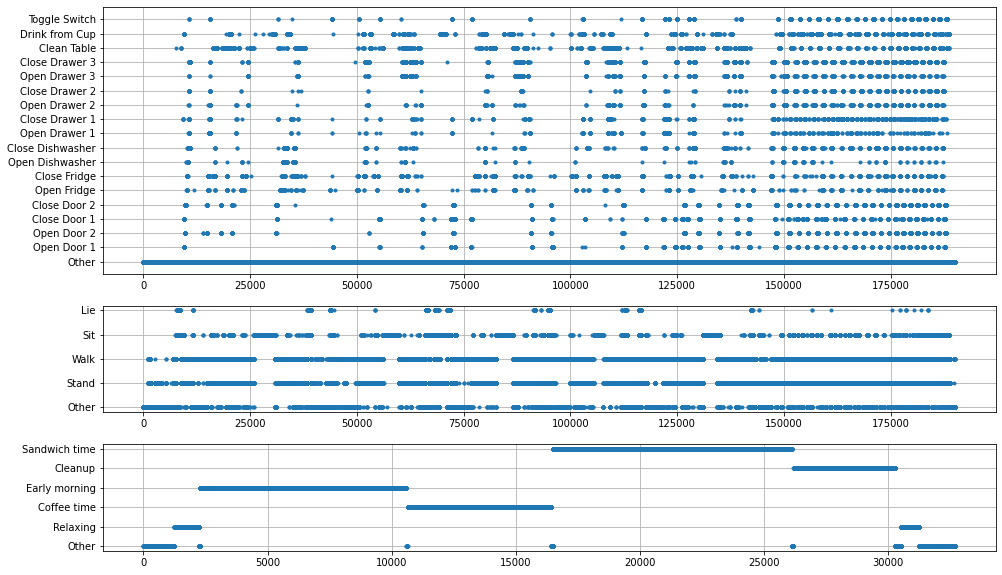

In [30]:
visualize_data_labels(pseudo_label_y ,label_list, show_other = True)